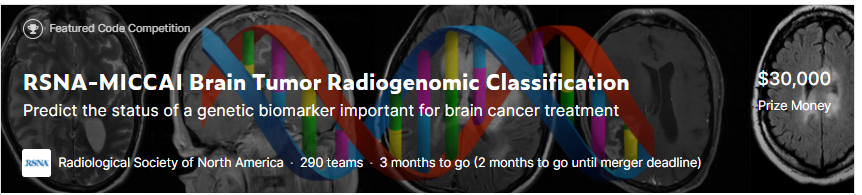

> 👨‍🔬脳の悪性腫瘍は生命を脅かす状態です。膠芽腫として知られるこの脳腫瘍は、成人で最も一般的な脳腫瘍であり、予後が最も悪く、生存期間の中央値は1年未満です。 MGMTプロモーターのメチル化として知られる腫瘍内の特定の遺伝子配列の存在は、化学療法に対する反応性の好ましい予後因子および強力な予測因子であることが示されています。
> 
> 
> 
> 現在、癌の遺伝子解析には、組織サンプルを抽出するための手術が必要です。その後、腫瘍の遺伝的特徴を決定するのに数週間かかる場合があります。結果と選択した初期治療の種類によっては、その後の手術が必要になる場合があります。画像診断（すなわち、ラジオゲノミクス）のみで癌の遺伝学を予測する正確な方法を開発できれば、手術の数を最小限に抑え、必要な治療の種類を改善できる可能性があります。
> 
> 北米放射線学会（RSNA）は、医用画像コンピューティングおよびコンピューター支援介入学会（MICCAI協会）と協力して、膠芽腫患者の診断および治療計画を改善しました。<font color="orange">このコンテストでは、MRI（磁気共鳴画像法）スキャンを使用して神経膠芽腫の遺伝的サブタイプを予測し、モデルをトレーニングおよびテストして、MGMTプロモーターのメチル化の存在を検出します。</font>
> 
> 成功すれば、脳腫瘍患者がより侵襲性の低い診断と治療を受けるのを助けるでしょう。手術前の新しくカスタマイズされた治療戦略の導入は、脳腫瘍患者の管理、生存、および見通しを改善する可能性があります。

> 🧑‍💻trainデータは、トレーニング、検証（公開）、およびテスト（非公開）の3つのコホートによって定義されます。 「トレーニング」コホートと「検証」コホートは参加者に提供されますが、「テスト」コホートは競技中および競技後は常に非表示になっています。
> 
> これらの3つのコホートは、次のように構成されています。それぞれの独立したケースには、5桁の番号で識別される専用のフォルダーがあります。 これらの「ケース」フォルダのそれぞれの中に、4つのサブフォルダがあり、それぞれがDICOM形式の構造的マルチパラメトリックMRI（mpMRI）スキャンのそれぞれに対応しています。 含まれている正確なmpMRIスキャンは次のとおりです。
> 
> Fluid Attenuated Inversion Recovery (FLAIR)<br>
> T1-weighted pre-contrast (T1w)<br>
> T1-weighted post-contrast (T1Gd)<br>
> T2-weighted (T2)

### こういうやり方が正しいかわかりません。ただ、私のような初心者はこんな感じでコンペを始めています。
### 他の人のEDAを見てもいいのですが、見るのと実際にやるのとでは、そのあとの自分の成長が大きく異なってくると思っています。
### なので、効率が悪くても自己流である程度はやるんです。giveupしてから、他の人のコードをみると感動します。

In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/competiongoal/archive/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><font color="black">
🧑‍⚕️ <b>Competition Goal</b>: モデルをトレーニングおよびテストして、MGMTプロモーターのメチル化の存在を検出します。
</div>

### 医療系です。DCMファイルがあるので画像識別が必要になります。
### まずは、EfficinetNeを使ってみようと思います。
### GPUすごい必要になるし、まだよくわからいところが多いので辛いんですが。
### 愚痴らないで、データを見ていきます。

In [ ]:
from pathlib import Path
import pandas as pd
import glob
import numpy as np
import pyarrow.parquet
import pyarrow as pa
import seaborn as sns
#import tqdm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import gc

import warnings
warnings.filterwarnings('ignore')

### 簡単によめそうなものから読んでいきます

### 🔶sample_submission.csv
これを提出することになります。

In [ ]:
sample_submission = pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/sample_submission.csv')
sample_submission

### 🔶train_labels.csv
submissionファイルと同じフォーマットですね。

In [ ]:
train_labels =pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train_labels

### dcmファイルを読めるようにします。

これでインストールするとインターネットアクセスなしでできます。

In [ ]:
!conda install '/kaggle/input/pydicom-conda-helper/libjpeg-turbo-2.1.0-h7f98852_0.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/libgcc-ng-9.3.0-h2828fa1_19.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/gdcm-2.8.9-py37h500ead1_1.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/conda-4.10.1-py37h89c1867_0.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/certifi-2020.12.5-py37h89c1867_1.tar.bz2' -c conda-forge -y
!conda install '/kaggle/input/pydicom-conda-helper/openssl-1.1.1k-h7f98852_0.tar.bz2' -c conda-forge -y

<pre> ### ファイルの構成
Training/Validation/Testing
│
└─── 00000
│   │
│   └─── FLAIR
│   │   │ Image-1.dcm
│   │   │ Image-2.dcm
│   │   │ ...
│   │   
│   └─── T1w
│   │   │ Image-1.dcm
│   │   │ Image-2.dcm
│   │   │ ...
│   │   
│   └─── T1wCE
│   │   │ Image-1.dcm
│   │   │ Image-2.dcm
│   │   │ ...
│   │   
│   └─── T2w
│   │   │ Image-1.dcm
│   │   │ Image-2.dcm
│   │   │ .....
│   
└─── 00001
│   │ ...
│   
│ ...   
│   
└─── 00002
│   │ ...

In [ ]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

MRIの知識がないので調べてみました。

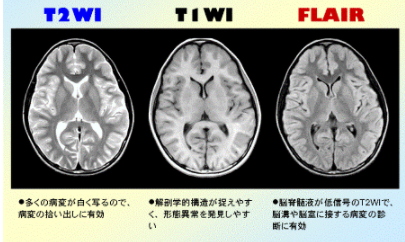

### MGMTはDNA修復酵素であり、DNA中のguanineからアルケル基を除去する働きがある。それにより、アルキリ化剤から細胞を保護する働きがある。<br>
### MGMTの有無が悪性神経腫瘍の子後因子であることが報告された。 よんでもさっぱりわかりません。

### MGMTの有無が重要みたいです。

### わからないので試しに１枚の画像をみてみます

In [ ]:
dicom = pydicom.read_file('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/Image-1.dcm')

In [ ]:
data = dicom.pixel_array
plt.imshow(data)

なにもない。。。。

In [ ]:
data.shape

In [ ]:
list = glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/*')
list = sorted(list)

### じゃあ、FLAIRフォルダ配下のファイルを少し読んでみる

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(20, 20))

for i in range(24):
    dicom = pydicom.read_file(list[i])
    data = dicom.pixel_array
    plt.subplot(4,6,i+1)
    plt.imshow(data)

どうも単純によんでもダメみたいです。１２枚セットになっている気もしないでもない。途中にブランクの画像があるので。

### trainフォルダ配下のファイル名を見てみる。

In [ ]:
!ls ../input/rsna-miccai-brain-tumor-radiogenomic-classification/train

<pre>trainフォルダは以下には00000～01010まであります。
ということは、trainファイルのBraTS21IDnの項目と一致していることを示しています。
これは患者さんを特定する番号と考えられます。説明に書いておいてほしいですね。

じゃあ、先ほど読んだ画像はみんな同じ患者さんの写真だ。どうみればいいのかな。

### 患者さん00000のFLAIR/T1w/T1wCE/T2wの画像数を数えてみる

In [ ]:
len(glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/*'))

In [ ]:
len(glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/T1w/*'))

In [ ]:
len(glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/T1wCE/*'))

In [ ]:
len(glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/T2w/*'))

<pre>うーん、画像数は結構違いますね。規則性もみえない。たまたまこうなっているのか。
面倒ですが、全員分みないとわからないですね。

先ほどよんだtrain_labels.csvをtrainへ入れます。

In [ ]:
train = pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train

患者さん毎の画像枚数をtrainへ入れていきます。とりあえず、枠を作ります。

In [ ]:
train['FLAIR'] = 0
train['T1w']=0
train['T1wCE']=0
train['T2w']=0

枠ができました。

In [ ]:
train

フォルダ名が５桁の数字になっているので、BraTS21IDの値を５桁にしてあげる必要があります。

<pre><font color="orange">Pythonで文字列・数値をゼロ埋め（ゼロパディング</font>）

  右寄せゼロ埋め: zfill()
  右寄せ、左寄せ、中央寄せ: rjust(), ljust(), center()

In [ ]:
train.info()

フォルダ名と同じ数字５桁化ができました。

In [ ]:
#train['BraTS21ID'] = train['BraTS21ID'].astype(str)
#train['BraTS21ID'] =train['BraTS21ID'].str.zfill(5)
#train

こちらのコードの方がかっこいいので、こちらに変更しました。やっていることは同じです。

In [ ]:
train["BraTS21ID"] = train["BraTS21ID"].apply(lambda x: str(x).zfill(5))
train

In [ ]:
file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/FLAIR/*'.format(i)
len(glob.glob(file))

数を数えていれて、項目に入れていきます。酷いコーディングですが、やり方これしか現在しらないので。。

In [ ]:
a=0
for i in train['BraTS21ID']:
    file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/FLAIR/*'.format(i)
    train['FLAIR'][a] = len(glob.glob(file))
    file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1w/*'.format(i)
    train['T1w'][a] = len(glob.glob(file))
    file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1wCE/*'.format(i)
    train['T1wCE'][a] = len(glob.glob(file))
    file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T2w/*'.format(i)
    train['T2w'][a] = len(glob.glob(file))
    a+=1


<pre>🌼なぜかはわかりませんが、数にばらつきがあります。580行目,583行目は4項目とも同じ数です。

これをみるとなにかわかるかも。580行目の患者さんはMGMT_value=1だから癌の可能性がある方ですね。583行目は癌の可能性はない方ですね。

患者さん01005（癌可能性あり）と01009（癌可能性なし）を調べてみます。２３枚。

In [ ]:
train

# 🌷FLAIR

### MGMT=1

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/FLAIR/*'.format('01005')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

### MGMT=0

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/FLAIR/*'.format('01009')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

💐違いがわかりません。というかどこを見て判断すればいいのか。

また、前回と一緒で医者じゃなきゃ見てもわからないよ。モデルを組んでデータを入れてごらん、とグランドマスターに言われそう。<br>
SIIMのときは、bboxがlabelとしてありましたが、今回はなにもありません。

無駄だと思いますが、他の種類のファイル見てみよう。データサイエンティストは辛抱強さが必要らしいし。

# 🌷T1w

### MGMT=1

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1w/*'.format('01005')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

### mgmt=0

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1w/*'.format('01009')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

# 🌷T1wCE

### MGMT=1

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1wCE/*'.format('01005')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

### MGMT=0

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T1wCE/*'.format('01009')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

# 🌷T2w

### MGMT=1

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T2w/*'.format('01005')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

### MGMT=0

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20, 20))

file ='../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/{}/T2w/*'.format('01009')
file_path = sorted(glob.glob(file))

for i in range(23):

    dicom = pydicom.read_file(file_path[i])
    data = dicom.pixel_array
    plt.subplot(5,5,i+1)
    plt.title(i)
    plt.axis("off")
    plt.imshow(data)

# ここから挑戦していきます。

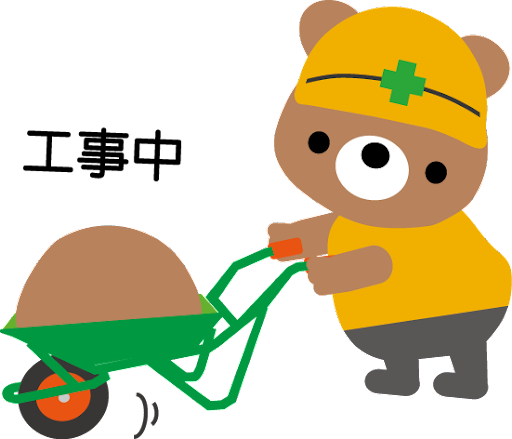

# いまの感想。大変だけど、efficientnetでまずはいってみよう。

In [ ]:
#!pip install ../input/timminstall/Pillow-8.3.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
#!pip install ../input/timminstall/numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
!pip install ../input/timminstall/timm/timm-0.4.12-py3-none-any.whl
#!pip install ../input/timminstall/torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl
#!pip install ../input/timminstall/torchvision-0.10.0-cp37-cp37m-manylinux1_x86_64.whl
#!pip install ../input/timminstall/typing_extensions-3.10.0.0-py3-none-any.whl

In [ ]:
import glob
import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm
import cv2

from torch.cuda.amp import autocast, GradScaler

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## timmで使えるモデル一覧

In [ ]:
#timm.list_models()

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform
# ====================================================
# Transforms
# ====================================================
def get_transforms(*, data):
    
    if data == 'train':
        return A.Compose([
            ToTensorV2(),
        ])

    elif data == 'valid':
        return A.Compose([
            ToTensorV2(),
        ])

### まずは、FLAIRを調べてみる

In [ ]:
train_data =pd.DataFrame()
list = sorted(glob.glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*/FLAIR/*'))
train_data['path'] =list
train_data['BraTS21ID'] = train_data['path'].str.split('/').str[4]
train_data

In [ ]:
train_data = pd.merge(train_data,train,on='BraTS21ID')
train_data

In [ ]:
# ====================================================
# Dataset
# ====================================================
class TrainDataset(Dataset):
    def __init__(self,df=train_data): #,transform=None):
        self.df = df
        self.file_paths = df['path']
        self.labels = df['MGMT_value']
        #self.transform = transform
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):

        dicom = pydicom.read_file(self.file_paths.iloc[idx])
        image = dicom.pixel_array
        image = cv2.resize(image,(512,512))
        image = image[np.newaxis,:,:]
        image = torch.from_numpy(image).int()
        
        #print(image_all,' ',type(image_all))
        label = torch.tensor(self.labels.iloc[idx]).int()
        #print(label)
        
        return image, label

### tensor int確認

In [ ]:
        dicom = pydicom.read_file(train_data.path[0])
        image = dicom.pixel_array
        image = cv2.resize(image,(512,512))
        image = image[np.newaxis,:,:]
        image = torch.from_numpy(image).int()
        
        #print(image_all,' ',type(image_all))
        label = torch.tensor(train_data.loc[0,'MGMT_value']).int()
        #print(label)

In [ ]:
label

In [ ]:
image

In [ ]:
class CFG:
    apex=False
    debug=False
    print_freq=100
    num_workers=4
    model_name='tf_efficientnet_b7_ns'
    scheduler='CosineAnnealingLR' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=3
    T_max=3 # CosineAnnealingLR
    lr=1e-4
    min_lr=1e-6
    batch_size=1
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    target_size=1
    target_col='MGMT_value'
    n_fold=5
    trn_fold=[0]

In [ ]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    score = roc_auc_score(y_true, y_pred)
    return score


def init_logger(log_file='train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()

In [ ]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
#TrainDataset.__getitem__(train,0)

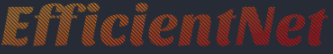

In [ ]:
# ====================================================
# MODEL
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, cfg, pretrained=False):
        super().__init__()
        self.cfg = cfg
        self.model = timm.create_model(self.cfg.model_name, pretrained=pretrained, in_chans=1) #入力チャネル1にしている。 
        self.n_features = self.model.classifier.in_features
        self.model.classifier = nn.Linear(self.n_features, self.cfg.target_size)

    def forward(self, x):#torch.Size([64, 1, 69, 193])
        output = self.model(x)
        return output
        

In [ ]:
#timm.create_model('tf_efficientnet_b7_ns', pretrained=False ,in_chans=1) 

In [ ]:
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    if CFG.apex:
        scaler = GradScaler()
    batch_time = AverageMeter() #class AverageMeter(object):
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        
        batch_size = labels.size(0)
        if CFG.apex:
            with autocast():
                y_preds = model(images)
                loss = criterion(y_preds.view(-1), labels)
        else:
            print(images.size())
            y_preds = model(images) 
            loss = criterion(y_preds.view(-1), labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        if CFG.apex:
            scaler.scale(loss).backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            if CFG.apex:
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  #'LR: {lr:.6f}  '
                  .format(
                   epoch+1, step, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(train_loader)),
                   grad_norm=grad_norm,
                   #lr=scheduler.get_lr()[0],
                   ))
            
    return losses.avg

In [ ]:
def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = criterion(y_preds.view(-1), labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(
                   step, len(valid_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(valid_loader)),
                   ))
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [ ]:
# ====================================================
# Train loop
# ====================================================
def train_loop(folds, fold):
    
    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    folds = train_data
    train['no'] =train['BraTS21ID'].astype(int)	
    trn_idx = folds[folds.no < 500].index
    val_idx = folds[folds.no <= 500].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_col].values

    train_dataset = TrainDataset(train_folds) #, transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds) #, transform=get_transforms(data='train'))

    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size, 
                              shuffle=True, 
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset, 
                              batch_size=CFG.batch_size * 2, 
                              shuffle=False, 
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)
    
    # ====================================================
    # scheduler 
    # ====================================================
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, pretrained=True)
    model.to(device)

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # loop
    # ====================================================
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf
    
    for epoch in range(CFG.epochs):
        
        start_time = time.time()
        
        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')

        if score > best_score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')
        
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')
    
    valid_folds['preds'] = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth', 
                                      map_location=torch.device('cpu'))['preds']

    return valid_folds

In [ ]:
#!mkdir /root/.cache
!mkdir /root/.cache/torch
!mkdir /root/.cache/torch/hub
!mkdir /root/.cache/torch/hub/checkpoints
!cp ../input/timminstall/tf_efficientnet_b7_ns-1dbc32de.pth/tf_efficientnet_b7_ns-1dbc32de.pth /root/.cache/torch/hub/checkpoints/

In [ ]:
train_folds

In [ ]:
    train_data['no'] =train['BraTS21ID'].astype(int)	
    folds = train_data.copy()
    trn_idx = folds[folds.no < 500].index
    val_idx = folds[folds.no >= 500].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_col].values

    train_dataset = TrainDataset(train_folds) #, transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds) #, transform=get_transforms(data='train'))

    train_loader = DataLoader(train_dataset,
                              batch_size=2, #CFG.batch_size, 
                              shuffle=True, 
                              num_workers=1) #, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset, 
                              batch_size=CFG.batch_size * 2, 
                              shuffle=False, 
                              num_workers=CFG.num_workers) #, pin_memory=True, drop_last=False)
    
    # ====================================================
    # scheduler 
    # ====================================================
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, pretrained=True)
    model.to(device)

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # loop
    # ====================================================
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf
    
    for epoch in range(CFG.epochs):
        
        start_time = time.time()
        
        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')

        if score > best_score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')
        
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')
    
    valid_folds['preds'] = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth', 
                                      map_location=torch.device('cpu'))['preds']


In [ ]:
train_folds

In [ ]:
valid_folds 

In [ ]:
    for step, (images, labels) in enumerate(train_loader):
        images

In [ ]:
train_dataset.__getitem__(0)

In [ ]:
# ====================================================
# main
# ====================================================
def main():

    """
    Prepare: 1.train 
    """

    def get_result(result_df):
        preds = result_df['preds'].values
        labels = result_df[CFG.target_col].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}')
    
    if 1==1:
        # train 
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(train, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)

In [ ]:
if __name__ == '__main__':
    main()

㊙🔰🗑⬛🟥🟨🟩